In [22]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Univariate Data

![title](theory/1.png)

![title](theory/2.png)

![title](theory/3.png)

![title](theory/4.png)

![title](theory/5.png)

**Testing With Manually Created Data** <br/>
Ground Truth Line --> y = 5x + 3 (w0 = 3, w1 = 5)

In [23]:
# random data according to the equation + some noise
x = [1, 4, -2, 6, 2, 5]
y = [7, 22, -6, 33.5, 12.5, 30]
n = len(x)

In [24]:
X, Y, XiYi, Xi2 = 0, 0, 0, 0

for i in range(n):
    X += x[i]
    Y += y[i]
    XiYi += x[i] * y[i]
    Xi2 += (x[i] ** 2)

print(x)
print(y)
print(X, Y, XiYi, Xi2)

[1, 4, -2, 6, 2, 5]
[7, 22, -6, 33.5, 12.5, 30]
16 99.0 483.0 86


In [25]:
w1 = (X*Y - n*XiYi) / (X**2 - n*Xi2)
w0 = (Y - w1*X) / n

print(f"y = {"{:.2f}".format(w1)}x + ({"{:.2f}".format(w0)})")

y = 5.05x + (3.02)


**Data Generator**

In [26]:
def gen_data (count=500, noise=10, slope=5, intercept=17):
    # np.random.seed(42)
    x = np.random.normal(0, 1.5, size=count)
    e = np.random.randn(count) * noise
    y = slope * x + intercept + e
    return x, y

def pred_param (x, y):
    X = x.sum()
    Y = y.sum()
    XiYi = (x * y).sum()
    Xi2 = (x ** 2).sum()

    w1 = (X*Y - n*XiYi) / (X**2 - n*Xi2)
    w0 = (Y - w1*X) / n

    return w0, w1

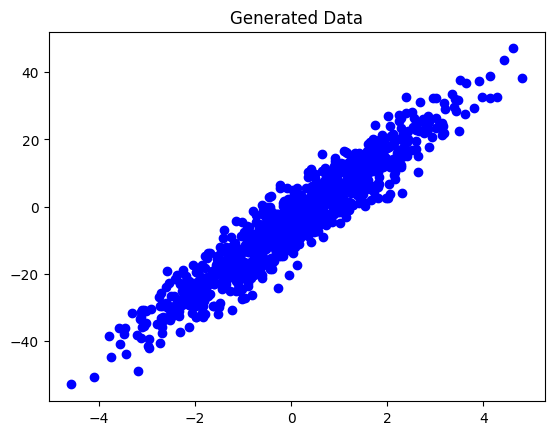

In [27]:
n = 1000
x, y = gen_data(count=n, noise=5, slope=10, intercept=-5)
plt.scatter(x, y, color='blue', label='Data Points')
plt.title("Generated Data")
plt.show()

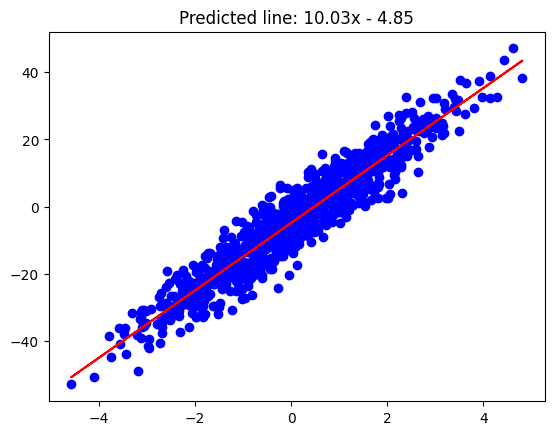

In [28]:
w = np.array(pred_param(x, y))
y_hat = w[0] + w[1] * x

plt.scatter(x, y, color='blue', label='Actual Data')
plt.plot(x, y_hat, color='red', label='Prediction (Closed Form)')
plt.title(f"Predicted line: {w[1]:.2f}x {"+" if (w[0] >= 0) else "-"} {np.abs(w[0]):.2f}")
plt.show()

# Multivariate Data

**Theory behind:**

![title](theory/6.png)

![title](theory/7.png)

In [29]:
def linear_regression_closed_form(x, y):
    # Add Bias Term to the input matrix in order to get w0
    x_p = np.c_[np.ones((len(x), 1)), x]
    # Closed-form equation: w = (x^T * x)^-1 * x^T * y
    w = np.linalg.inv(x_p.T.dot(x_p)).dot(x_p.T).dot(y)
    return w, x_p

Testing with the generated univariate data: 

In [30]:
w, x = linear_regression_closed_form(x, y)
print(f"Predicted line: {w[1]:.2f}x {"+" if (w[0] >= 0) else "-"} {np.abs(w[0]):.2f}")

Predicted line: 10.03x - 4.85


**Trying this solution on The California Housing dataset**

In [31]:
import tarfile
with tarfile.open("datasets/housing.tgz") as housing_tarball:
        housing_tarball.extractall(path="datasets", filter="tar")
housing = pd.read_csv("datasets/housing/housing.csv")
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


**Basic feature engineering**
* No typical test-train split
* No Fancy Data Cleaning etc.

In [32]:
# Creating some meaningfull attributes
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["people_per_house"] = housing["population"] / housing["households"]

# Pearson's r
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
rooms_per_house       0.151948
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
people_per_house     -0.023737
population           -0.024650
longitude            -0.045967
latitude             -0.144160
bedrooms_ratio       -0.255880
Name: median_house_value, dtype: float64

In [33]:
# Separating features and labels
housing_labels = housing["median_house_value"].copy()
housing = housing.drop("median_house_value", axis=1)

# Not gonna work with categorical data yet
housing = housing.drop("ocean_proximity", axis=1)

In [34]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   rooms_per_house     20640 non-null  float64
 9   bedrooms_ratio      20433 non-null  float64
 10  people_per_house    20640 non-null  float64
dtypes: float64(11)
memory usage: 1.7 MB


There are some missing values in 2 columns, fortunately numerical

In [35]:
# Imputation for missing values
from sklearn.impute import SimpleImputer

# An instance of the class
imputer = SimpleImputer(strategy="median")
imputer.fit(housing)
X = imputer.transform(housing)

# converting Numpy array "X" to a Pandas DataFrames
housing_tr = pd.DataFrame(X, columns=housing.columns, index=housing.index)

In [36]:
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   rooms_per_house     20640 non-null  float64
 9   bedrooms_ratio      20640 non-null  float64
 10  people_per_house    20640 non-null  float64
dtypes: float64(11)
memory usage: 1.7 MB


In [37]:
# Converting data to np arrays
x = housing_tr.to_numpy()
y = housing_labels.to_numpy()

In [38]:
w, x = linear_regression_closed_form(x, y)
w

array([-3.59859255e+06, -4.17049901e+04, -4.12297167e+04,  1.15210660e+03,
        2.15306695e+00,  6.55904938e+00, -4.17015384e+01,  1.16744370e+02,
        4.21496009e+04,  3.11593934e+03,  3.12561436e+05,  6.52645282e+01])

In [39]:
y_hat = x.dot(w)

# Root Mean Squared Error
def RMSE (y_hat, y): # coulld just import RMSE from sklearn
    return np.sqrt((((y - y_hat) ** 2)).sum() / len(y))

rmse = RMSE(y_hat, y)
print(rmse)

68611.47281011532


Not perfect for sure, but acceptable for a simple linear predictor 🤷‍♂️

In [40]:
# Accuracy Calculator
def acc_perc (y_hat, y):
    return (np.absolute(y_hat - y) / y * 100).sum() / len(y)


print(f"The predicted prices are {(100 - acc_perc(y_hat, y)):.2f}% accurate!")

The predicted prices are 70.16% accurate!


**Visualize the result**<br/>
Predictions vs. Actual prices

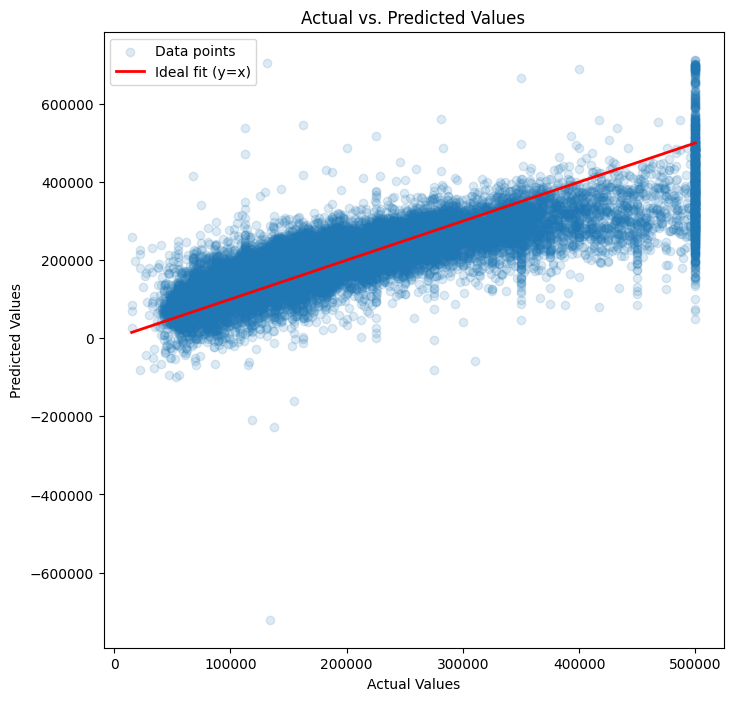

In [41]:
plt.figure(figsize=(8, 8))
plt.scatter(y, y_hat, alpha=0.15, label='Data points')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', lw=2, label='Ideal fit (y=x)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()